## Random Forest Models
This file will be fore building and testing random forest models on the data from the preprocessed dataset as well as PCA, MI, PI, and MI-PI

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [283]:
full_df = pd.read_csv('data/filtered_normalized.csv')
pca_df = pd.read_csv('data/PCA_components_GWP.csv')
mi_df = pd.read_csv('data/MI_variables.csv')

## Random Forest Full Data Set

In [284]:
X_full = full_df.drop(['GWP'], axis=1)
y_full = full_df['GWP']
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.2, random_state=21)

In [285]:
rf = RandomForestRegressor(n_estimators = 300, criterion='poisson')

rf.fit(X_full_train, y_full_train)
full_pred = rf.predict(X_full_test)
full_pred_train = rf.predict(X_full_train)

print("MSE:", mean_squared_error(full_pred, y_full_test))
print("R^2:", r2_score(full_pred, y_full_test))

MSE: 267.4113419004315
R^2: -2.253551600372851


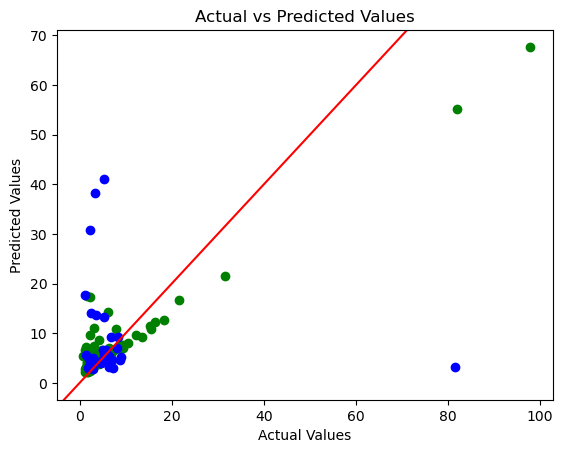

In [286]:
plt.scatter(y_full_train, full_pred_train, color = 'green')
plt.scatter(y_full_test, full_pred, color = 'blue')
plt.axline([0, 0], [1, 1], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Random Forest PCA

In [287]:
X_pca = pca_df.drop(['GWP'], axis=1)
y_pca = pca_df['GWP']
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=21)

In [288]:
rf.fit(X_pca_train, y_pca_train)
pca_pred = rf.predict(X_pca_test)
pca_pred_train = rf.predict(X_pca_train)


print("MSE:", mean_squared_error(pca_pred, y_pca_test))
print("R^2:", r2_score(pca_pred, y_pca_test))

MSE: 176.87545905227367
R^2: -13.027294873072606


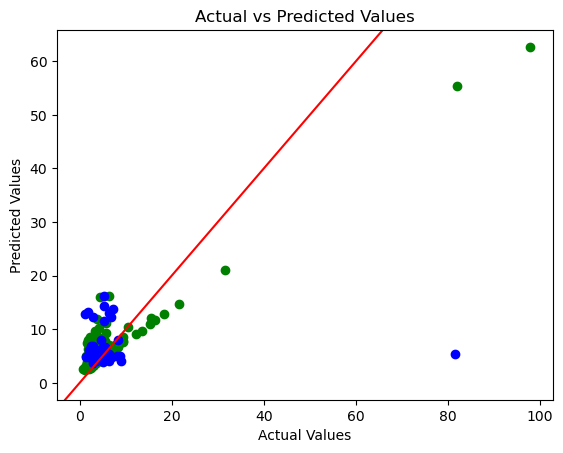

In [289]:
plt.scatter(y_pca_train, pca_pred_train, color='green')
plt.scatter(y_pca_test, pca_pred, color='blue')
plt.axline([0, 0], [1, 1], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Fandom Forest MI

In [290]:
X_mi = mi_df.drop(['GWP'], axis=1)
y_mi = mi_df['GWP']
X_mi_train, X_mi_test, y_mi_train, y_mi_test = train_test_split(X_mi, y_mi, test_size=0.2, random_state=21)

In [291]:
rf.fit(X_mi_train, y_mi_train)
mi_pred = rf.predict(X_mi_test)
mi_pred_train = rf.predict(X_mi_train)

print("MSE:", mean_squared_error(mi_pred, y_mi_test))
print("R^2:", r2_score(mi_pred, y_mi_test))

MSE: 355.84990825341794
R^2: -1.144056640043094


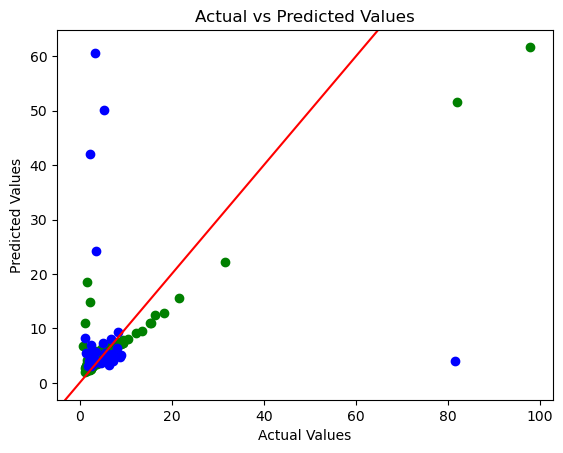

In [292]:
plt.scatter(y_mi_train, mi_pred_train, color='green')
plt.scatter(y_mi_test, mi_pred, color='blue')
plt.axline([0, 0], [1, 1], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()